## Developing the artificial benchmark for federated learning spam detection

This aims at developing a benchmark for spam email detection using federated learning. The files will be generated\
with their name embedding one of the 2 classification categories: spam and not spam. This benchmark is parameterized to\
be able to quantify the difficulty.

### What is the alphabet used?
english alphabet

### How are words composed?
Words are represented by embeddings vectors of length $n$. For simplicity, we start with $n=10$.

### How are sentences composed?
Sentences will be composed of $m$ words embeddings following a defined grammar. For simplicity, we start with \
$m = 3$ words arrange in $noun + verb + noun$ configuration.The configuration is defined by a gammar G.

### What is the grammar?
Concatenation of the words vectors

### How are emails composed?
Emails are considered paragraphs made of sentences. An email will be made of $k$ sentences.

### How is a spam defined?


In [86]:
import numpy as np

In [87]:
def gen_embedding(n=10):
    '''
    Generate a random float vector of length n with values between -1 and 1
    '''
    res = np.random.rand(n)
    res = res * 2 - 1
    # convert to list
    res = res.tolist()
    return res


In [88]:
def gen_sentence(m=3):
    '''
    Generate a sentence of length m
    '''
    return [gen_embedding() for _ in range(m)]


In [89]:
def gen_paragraph(k=5):
    '''
    Generate a paragraph of length n
    '''
    return [gen_sentence() for _ in range(k)]

In [90]:
def check_spam(paragraph):
    '''
    Check if a paragraph is spam
    input: paragraph
    '''
    for sentence in paragraph:
        for word in sentence:
            if sum(word)/len(word) > .4:
                return True
    return False

In [91]:
def gen_files(n=10):
    '''
    Generate n files
    '''
    for i in range(n):
        paragraph = gen_paragraph()
        is_spam = check_spam(paragraph)
        if is_spam:
            with open(f'./test/spam_{i}.txt', 'w') as f:
                f.write(str(paragraph))
                f.write('\n')
        else:
            with open(f'./test/email_{i}.txt', 'w') as f:
                f.write(str(paragraph))
                f.write('\n')

In [92]:
# Generate 20 files
gen_files(20)

#### Network of Devices


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
# from scipy.stats import powerlaw
import numpy as np

In [34]:
class Message:
    '''Message passed by node'''
    def __init__(self, sender, receiver, content):
        self.sender = sender
        self.receiver = receiver
        self.content = content
        self.timestamp = 0

    def __str__(self) -> str:
        return f'Message {self.content} from {self.sender} to {self.receiver}'

    

    

In [30]:
class Node:
    '''A node device in the network'''
    def __init__(self, id, neighbors):
        self.id = id
        self.neighbors = neighbors
        self.constraints = []
        self.model = None
        self.data = None
        self.is_trained = False
        self.is_updated = False
        self.is_selected = False
        self.is_sent = False
        self.is_received = False
        self.spam_params = [] # parameters for spam detection according to power law

        # message queues 
        self.incoming_msgs = []
        self.outgoing_msgs = []

        # # initialize list of incoming messages at random
        # for neighbor in self.neighbors:
        #     # generate a random message
        #     msg = Message(self.id, neighbor.id, None)
        #     # add the message to the incoming messages
        #     self.incoming_msgs.append(msg)
    
    def __str__(self):
        return f'Node {self.id}'

    def __repr__(self):
        return f'Node {self.id}'

    
    def process_incoming_msgs(self):
        '''Process incoming messages'''
        for msg in self.incoming_msgs:
            # process the message
            res = self.process_msg(msg)
            self.outgoing_msgs.append(res)
        # clear the incoming messages
        self.incoming_msgs = []

    def send_outgoing_msgs(self):
        '''Send outgoing messages'''
        for msg in self.outgoing_msgs:
            # send the message
            self.send_msg(msg)
        # clear the outgoing messages
        self.outgoing_msgs = []

    def send_msg(self, msg):
        '''Send a message to a neighbor'''
        # get the receiver node
        receiver = msg.receiver
        
        # add the message to the receiver's incoming messages
        receiver.incoming_msgs.append(msg)
        # set the message as sent
        self.is_sent = True


    def process_msg(self, msg):
        '''Process a message'''
        # process the message
        msg.content = 'processed'
        return msg

    def run(self):
        '''Run the node'''
        # do stuff 
        # process incoming messages
        print(f'Processing incoming messages for {self}')
        self.process_incoming_msgs()
        # send outgoing messages
        print(f'Sending outgoing messages for {self}')
        self.send_outgoing_msgs()
        # print queues
        print(f'Incoming messages for {self}: {self.incoming_msgs}')
        print(f'Outgoing messages for {self}: {self.outgoing_msgs}')

        


In [32]:
class Network:
    '''Network of nodes implemented as a graph'''
    def __init__(self):
        self.nodes = {}
        self.edges = {}

        # initialize the network at random
        # generate a random number of nodes
        n = 100
        # generate a random number of edges
        m = np.random.randint(5, 10)
        # generate a random graph according to power law
        G = nx.powerlaw_cluster_graph(n, m, 0.1)
        # get the nodes
        nodes = list(G.nodes)
        # print(f'Nodes: {nodes}')
        # get the edges
        edges = list(G.edges)
        # print(f'edges: {edges}')
        # add the nodes to the network
        for node in nodes:
            self.add_node(node, [])
        # add the edges to the network
        for edge in edges:
            self.add_edge(edge[0], edge[1])


    def __str__(self):
        return f'Network with {len(self.nodes)} nodes and {len(self.edges)} edges'

    def plot(self):
        '''Plot the network'''
        # get the nodes
        nodes = list(self.nodes.keys())
        # get the edges
        edges = list(self.edges.keys())
        # create the graph
        G = nx.Graph()
        # add the nodes
        G.add_nodes_from(nodes)
        # add the edges
        G.add_edges_from(edges)
        # plot the graph
        nx.draw(G, with_labels=True)
        plt.title("Random Graph Generation")
        # make plot bigger
        plt.rcParams['figure.figsize'] = [10, 10]
        plt.show()

    def add_node(self, id, neighbors):
        '''Add a node to the network'''
        # create the node
        node = Node(id, neighbors)
        # add the node to the network
        self.nodes[id] = node
        # add the edges to the network
        for neighbor in neighbors:
            self.edges[(id, neighbor.id)] = 1

    def add_edge(self, id1, id2):
        '''Add an edge to the network'''
        # add the edge to the network
        self.edges[(id1, id2)] = 1
        # add the edge to the nodes
        self.nodes[id1].neighbors.append(self.nodes[id2])
        self.nodes[id2].neighbors.append(self.nodes[id1])

    def get_node(self, id):
        '''Get a node from the network'''
        return self.nodes[id]

    def get_neighbors(self, id):
        '''Get a node's neighbors'''
        return self.nodes[id].neighbors
    
    def simulate(self, iterations=10):
        '''Run the message passing simulation'''
        # initialize the incoming messages at random for all nodes
        for node in self.nodes.values():
            # get node object
            # node = self.get_node(node)
            # generate a random message to each neighbor
            for neighbor in node.neighbors:
                print(f'Node {node} has neighbor {neighbor}')
                # generate a random message
                msg = Message(node, neighbor, None)
                # add the message to the incoming messages
                node.incoming_msgs.append(msg)
        
        # run the simulation
        for i in range(iterations):
            # run each node
            for node in self.nodes.values():
                node.run() # nodes communicate with each other
            # # print the network
            # print(self)
            # # plot the network
            # self.plot()


            


Network with 100 nodes and 473 edges


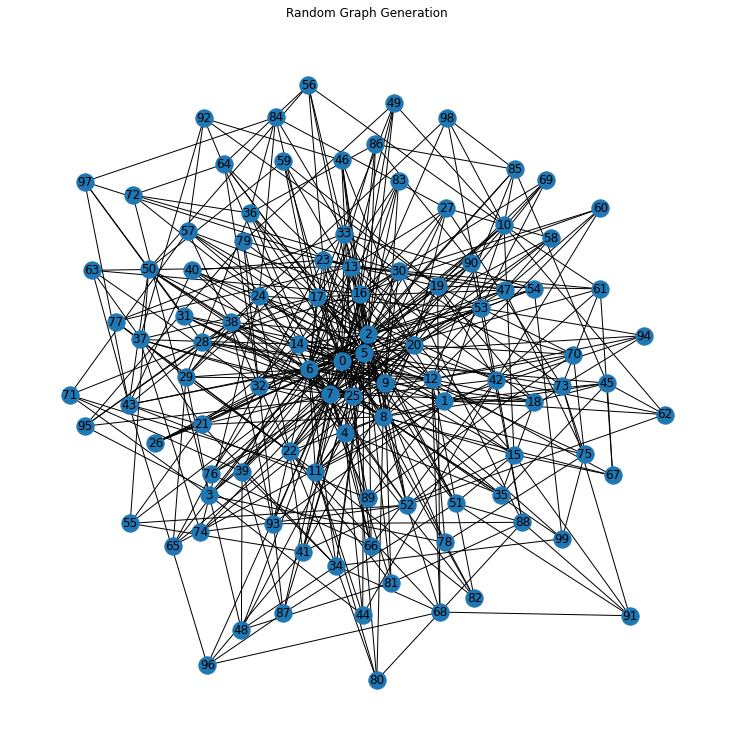

Node Node 0 has neighbor Node 5
Node Node 0 has neighbor Node 6
Node Node 0 has neighbor Node 8
Node Node 0 has neighbor Node 9
Node Node 0 has neighbor Node 10
Node Node 0 has neighbor Node 12
Node Node 0 has neighbor Node 13
Node Node 0 has neighbor Node 16
Node Node 0 has neighbor Node 17
Node Node 0 has neighbor Node 21
Node Node 0 has neighbor Node 22
Node Node 0 has neighbor Node 25
Node Node 0 has neighbor Node 26
Node Node 0 has neighbor Node 28
Node Node 0 has neighbor Node 30
Node Node 0 has neighbor Node 31
Node Node 0 has neighbor Node 33
Node Node 0 has neighbor Node 35
Node Node 0 has neighbor Node 38
Node Node 0 has neighbor Node 40
Node Node 0 has neighbor Node 41
Node Node 0 has neighbor Node 43
Node Node 0 has neighbor Node 45
Node Node 0 has neighbor Node 48
Node Node 0 has neighbor Node 50
Node Node 0 has neighbor Node 51
Node Node 0 has neighbor Node 54
Node Node 0 has neighbor Node 55
Node Node 0 has neighbor Node 57
Node Node 0 has neighbor Node 59
Node Node 0 ha

In [35]:
# create a network
network = Network()
# print the network
print(network)
# plot the network
network.plot()
# simulate the network
network.simulate()


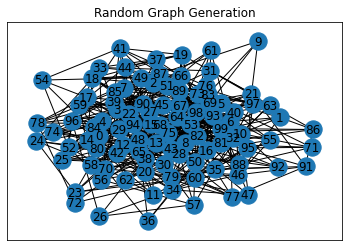

In [8]:

def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g


n = 100
p = 0.1
G = ER(n, p)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Random Graph Generation")
plt.show()


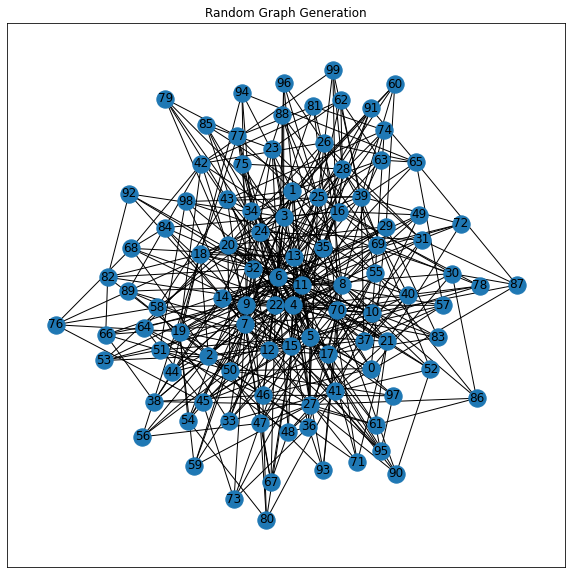

In [7]:
# generate a random graph with 100 nodes at poerlaw distribution
n = 100
G = nx.powerlaw_cluster_graph(n, 5, 0.1)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Random Graph Generation")
# make plot bigger
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv file into a dataframe
df = pd.read_csv('data/bleaching.csv')

/home/erud1t3/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# split the data by Site_ID
sites = df.groupby('Site_ID')
print(f'Number of sites: {len(sites)}')

Number of sites: 12230


In [7]:
# write data to csv files according to Site_ID
for site in sites:
    # get the site id
    site_id = site[0]
    # get the site data
    site_data = site[1]
    # write the data to a csv file
    site_data.to_csv(f'data/bleaching_{site_id}.csv', index=False)

## Evaluation on Real Data